<a href="https://colab.research.google.com/github/Sugina99/Deep_Learning_Studies/blob/main/CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [2]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip=tf.keras.utils.get_file('/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs.zip',origin=_URL,extract=True)

In [3]:
path_to_zip

'/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs.zip'

In [4]:
os.path.dirname(path_to_zip)

'/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN'

In [5]:
# unzip the data
# PATH=os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs.zip')
# New_PATH='/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs'

# !unzip $PATH -d $New_PATH

In [6]:
DataPath='/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs/cats_and_dogs_filtered'
DataPath

'/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [7]:
! ls $DataPath

train  validation  vectorize.py


In [8]:
train_dir=os.path.join(DataPath,'train')
validation_dir=os.path.join(DataPath,'validation')

In [9]:
! ls $train_dir

cats  dogs


In [10]:
TrainCat_dir=os.path.join(train_dir,'cats') #directory of training cat pics
TrainDog_dir=os.path.join(train_dir,'dogs') #directory of training dog pics
ValidationCat_dir=os.path.join(validation_dir,'cats') #directory of validation cat pics
ValidationDog_dir=os.path.join(validation_dir,'dogs') #directory of validation dogs pics

In [11]:
TrainCat_dir

'/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/cats_and_dogs/cats_and_dogs_filtered/train/cats'

In [12]:
len(os.listdir(TrainCat_dir))

1000

In [13]:
num_cat_tr=len(os.listdir(TrainCat_dir))
num_dog_tr=len(os.listdir(TrainDog_dir))
num_cat_val=len(os.listdir(ValidationCat_dir))
num_dog_val=len(os.listdir(ValidationDog_dir))

total_train=num_cat_tr + num_dog_tr
total_validation=num_cat_val + num_dog_val

In [14]:
print("total training cat images : ",num_cat_tr)
print("total training dog images : ",num_dog_tr)
print("------------------------------------")
print("total validation cat images : ",num_cat_val)
print("total validation dog images : ",num_dog_val)
print("------------------------------------")
print("total training images : ",total_train)
print("total validation images : ",total_validation)

total training cat images :  1000
total training dog images :  1000
------------------------------------
total validation cat images :  500
total validation dog images :  500
------------------------------------
total training images :  2000
total validation images :  1000


In [15]:
Batch_size=128 # power of 2......> 64,128,256,512
epochs=10
IMG_HEIGHT=150
IMG_WIDTH=150

In [16]:
train_image_generator=ImageDataGenerator(rescale=1./255) # generator for training data
validation_image_generator=ImageDataGenerator(rescale=1./255) # generator for validation data

In [17]:
# train image generator

train_data_gen=train_image_generator.flow_from_directory(
                                          batch_size=Batch_size,
                                          directory=train_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # multiclass---> class_mode='categorical'

Found 2000 images belonging to 2 classes.


In [18]:
# validation image generator

validation_data_gen=validation_image_generator.flow_from_directory(
                                          batch_size=Batch_size,
                                          directory=validation_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # multiclass---> class_mode='categorical'

Found 1000 images belonging to 2 classes.


In [19]:
sample_training_images,check =next(train_data_gen)

In [20]:
check

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [21]:
len(sample_training_images)

128

In [22]:
# This function wil plot images in the form of a grid with 1 row and 5 columns where images are placed in each column

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

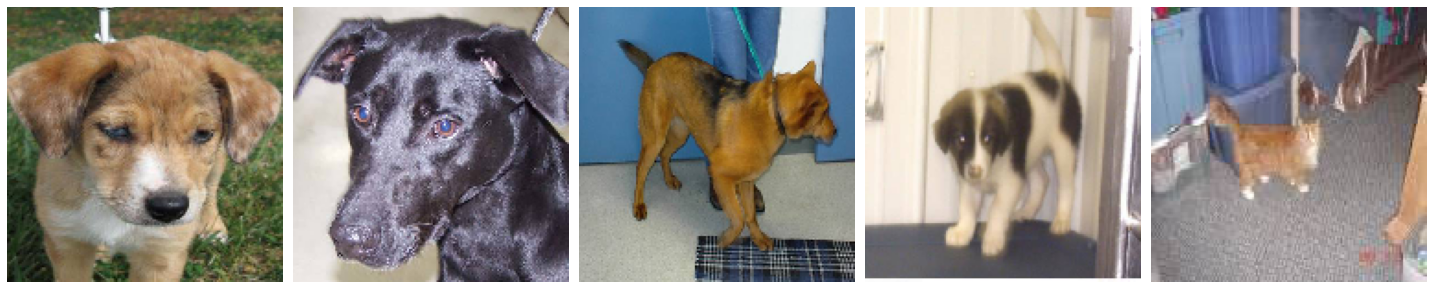

In [23]:
plotImages(sample_training_images[4:9])

In [24]:
# Model Training
model=Sequential([
      Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
      MaxPooling2D(),
      Conv2D(32,3,padding='same',activation='relu'),
      MaxPooling2D(),
      Conv2D(64,3,padding='same',activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(1,activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [27]:
history=model.fit(train_data_gen,
          steps_per_epoch=total_train//Batch_size,
          epochs=10,
          validation_data=validation_data_gen,
          validation_steps=total_validation//Batch_size
          )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 532s 36s/step - loss: 0.7497 - accuracy: 0.5187 - val_loss: 0.6899 - val_accuracy: 0.5045
Epoch 2/10
15/15 [==============================] - 11s 771ms/step - loss: 0.6922 - accuracy: 0.5417 - val_loss: 0.6809 - val_accuracy: 0.6239
Epoch 3/10
15/15 [==============================] - 11s 774ms/step - loss: 0.6732 - accuracy: 0.5940 - val_loss: 0.7097 - val_accuracy: 0.5279
Epoch 4/10
15/15 [==============================] - 11s 765ms/step - loss: 0.6521 - accuracy: 0.6127 - val_loss: 0.6365 - val_accuracy: 0.6339
Epoch 5/10
15/15 [==============================] - 11s 774ms/step - loss: 0.5983 - accuracy: 0.6757 - val_loss: 0.6035 - val_accuracy: 0.6897
Epoch 6/10
15/15 [==============================] - 11s 769ms/step - loss: 0.5620 - accuracy: 0.7041 - val_loss: 0.6031 - val_accuracy: 0.6842
Epoch 7/10
15/15 [==============================] - 11s 767ms/step - loss: 0.5287 - accuracy: 0.7137 - val_loss: 0.6125 - val_accuracy: 0.6763
Epoch 8/10


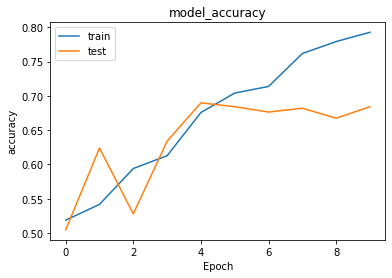

In [28]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

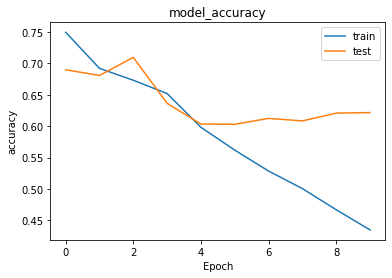

In [29]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [30]:
# Predict with new data (CAT)
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/IMAGES/cat1.jpg")
im = im.resize(img_size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict([im])
if pred[0][0]>0.5:
  print(f"DOG {pred[0][0]}")
else:
  print(f"CAT {pred[0][0]}")



1/1 [==============================] - 0s 175ms/step
CAT 0.1681918054819107


In [31]:
# Predict with new data (DOG)
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/IMAGES/dog1.jpg")
im = im.resize(img_size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict([im])
if pred[0][0]>0.5:
  print(f"DOG {pred[0][0]}")
else:
  print(f"CAT {pred[0][0]}")



1/1 [==============================] - 0s 15ms/step
DOG 0.9504868388175964


# saving the model

In [32]:
model.save("/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/catvsdog_clf.h5")

In [33]:
from keras.models import load_model
model_h5=load_model("/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/catvsdog_clf.h5")

In [34]:
im = Image.open("/content/drive/MyDrive/LibrariesForAI/Deep_learning/CNN/IMAGES/dog1.jpg")
im = im.resize(img_size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model_h5.predict([im])
if pred[0][0]>0.5:
  print(f"DOG {pred[0][0]}")
else:
  print(f"CAT {pred[0][0]}")

1/1 [==============================] - 0s 63ms/step
DOG 0.9504868388175964


# DATA AUGMENTATION

Found 2000 images belonging to 2 classes.


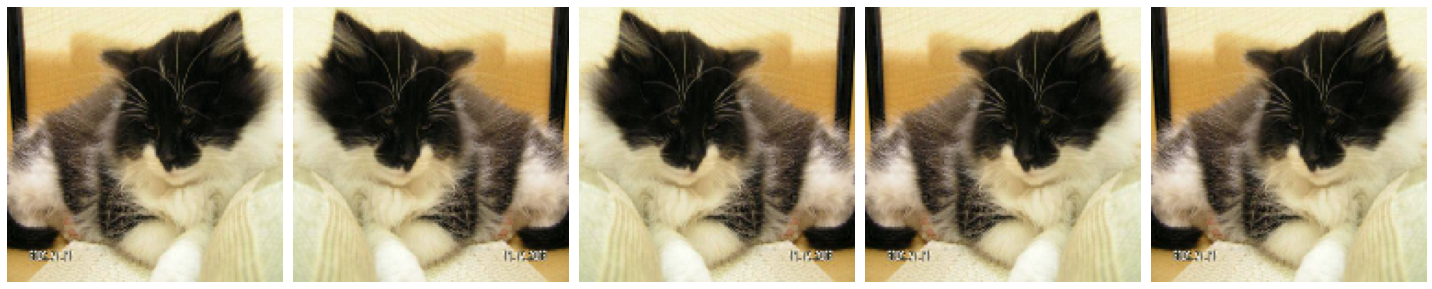

In [35]:
# 1) Horizontal Flip

train_image_horizontal=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_images_horizontal_gen=train_image_horizontal.flow_from_directory(batch_size=Batch_size,
                                                                       directory=train_dir,
                                                                       shuffle=True,
                                                                       target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                                       class_mode='binary')

augmented_images=[train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


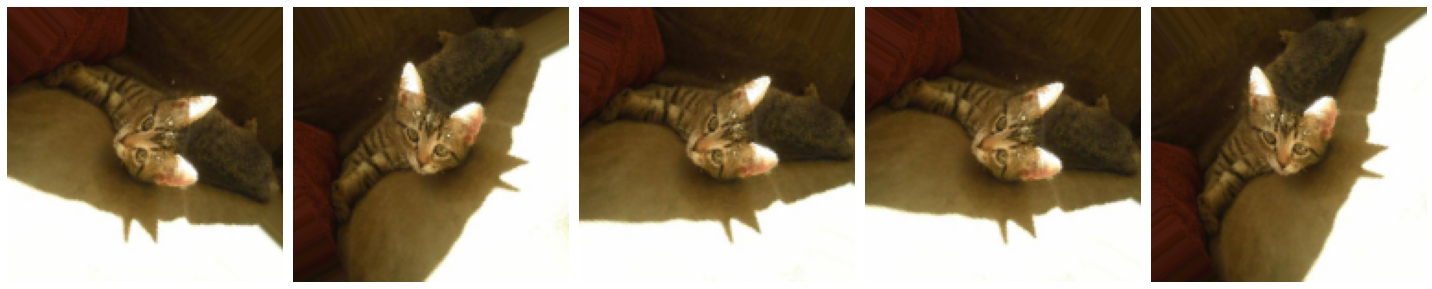

In [36]:
# 2) Rotating image

train_image_rotation=ImageDataGenerator(rescale=1./255,rotation_range=45)
train_images_rotation_gen=train_image_rotation.flow_from_directory(batch_size=Batch_size,
                                                                       directory=train_dir,
                                                                       shuffle=True,
                                                                       target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                                       class_mode='binary')

augmented_images=[train_images_rotation_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


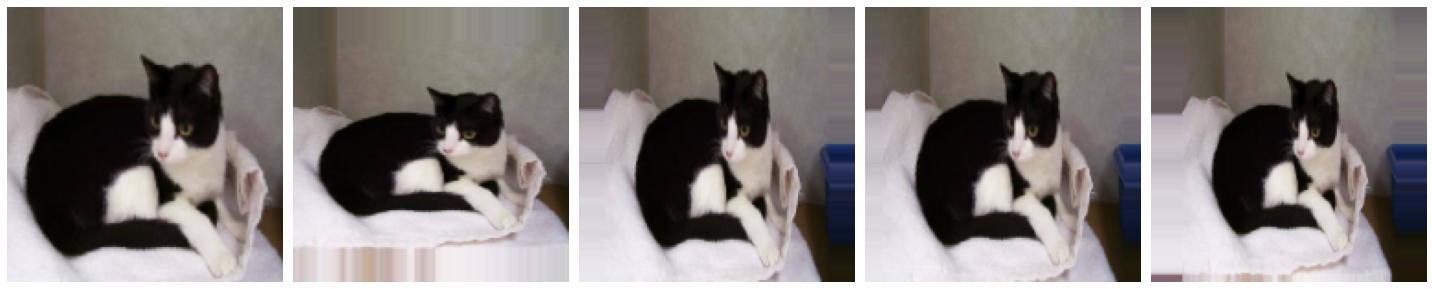

In [37]:
# 3) Zooming image

train_image_zoom=ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_images_zoom_gen=train_image_zoom.flow_from_directory(batch_size=Batch_size,
                                                                       directory=train_dir,
                                                                       shuffle=True,
                                                                       target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                                       class_mode='binary')

augmented_images=[train_images_zoom_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [38]:
train_image_generator=ImageDataGenerator(rescale=1./255,
                                         horizontal_flip=True,
                                         rotation_range=45,
                                         zoom_range=0.5,
                                         width_shift_range=0.15,
                                         height_shift_range=0.15)

In [39]:
train_data_gen=train_image_generator.flow_from_directory(
                                          batch_size=Batch_size,
                                          directory=train_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


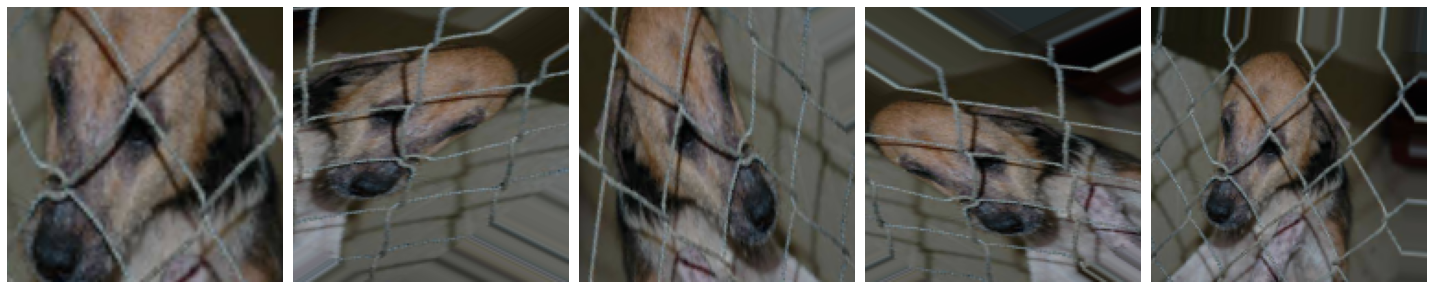

In [40]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [41]:
# Model Training
# Dropout
model_new=Sequential([
      Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
      MaxPooling2D(),
      Dropout(0.2),
      Conv2D(32,3,padding='same',activation='relu'),
      MaxPooling2D(),
      Conv2D(64,3,padding='same',activation='relu'),
      MaxPooling2D(),
      Dropout(0.2),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(1,activation='sigmoid')
])

In [42]:
model_new.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [43]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [44]:
history=model_new.fit(train_data_gen,
          steps_per_epoch=total_train//Batch_size,
          epochs=30,
          validation_data=validation_data_gen,
          validation_steps=total_validation//Batch_size
          )

Epoch 1/30
15/15 [==============================] - 22s 1s/step - loss: 2.1663 - accuracy: 0.5107 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 19s 1s/step - loss: 0.6963 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 19s 1s/step - loss: 0.6934 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5714
Epoch 4/30
15/15 [==============================] - 19s 1s/step - loss: 0.6929 - accuracy: 0.5422 - val_loss: 0.6916 - val_accuracy: 0.5223
Epoch 5/30
15/15 [==============================] - 19s 1s/step - loss: 0.6921 - accuracy: 0.5235 - val_loss: 0.6887 - val_accuracy: 0.5681
Epoch 6/30
15/15 [==============================] - 19s 1s/step - loss: 0.6887 - accuracy: 0.5475 - val_loss: 0.6771 - val_accuracy: 0.5949
Epoch 7/30
15/15 [==============================] - 19s 1s/step - loss: 0.6858 - accuracy: 0.5427 - val_loss: 0.6804 - val_accuracy: 0.5938
Epoch 8/30
15/15 [==

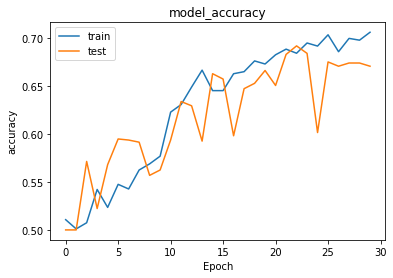

In [45]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

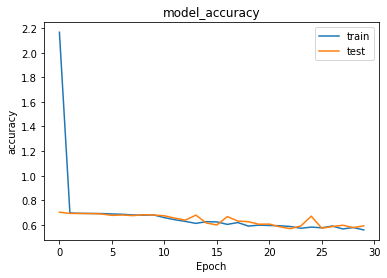

In [46]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()